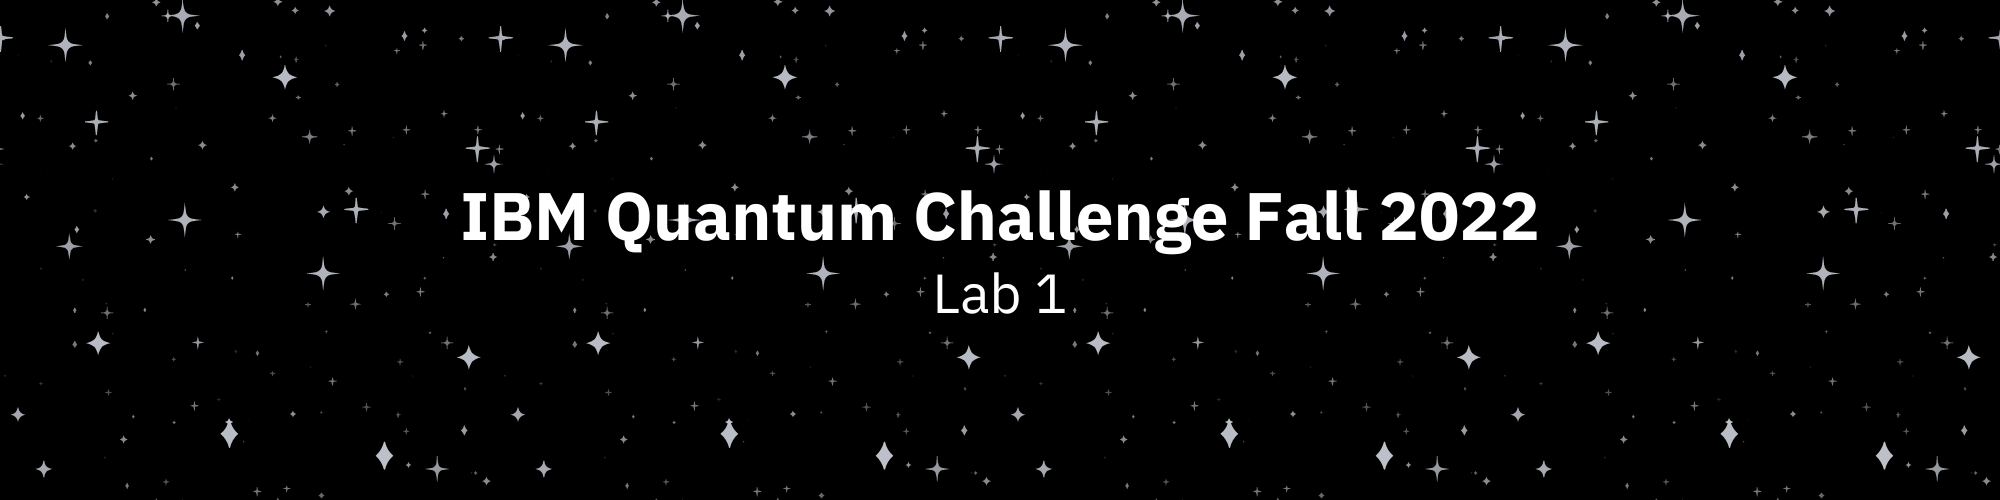

# Qiskit Runtime의 Primitives 소개

# 목차
- **[스토리](#스토리)**
- **[파트 I: Primitives 소개](#Part-I:-Primitives-소개)**
- **[파트 II: Getting Started with Qiskit Runtime](#파트-II:-Getting-Started-with-Qiskit-Runtime)**
- **[파트 III: How to Use Primitives](#파트-III:-How-to-Use-Primitives)**
    - **[연습문제 1: build the Bernstein Vazirani function](#exercise1)**
    - **[연습문제 2: bind parameters to a parametrized circuit using `Sampler`](#exercise2)**
    - **[연습문제 3: build an Estimator routine to compute the expectation values of Hamiltonians](#exercise3)**
- **[파트 IV: Error Mitigation Opening](#파트-IV:-Introduction-to-Error-Mitigation-and-Error-Suppression-on-Qiskit-Runtime)**
    - **[연습문제 4: choose the correct statements about error correction](#exercise4)**
- **[파트 V: Example Using Both Primitives](#파트-V:-Example-Using-Both-Primitives---Unscrambling-the-message!)**
    - **[연습문제 5: apply noise mitigation techniques](#exercise5)**
    - **[연습문제 6: verify what the message is](#exercise6)**

# 스토리

## 오프닝 스토리 - 프롤로그

오프닝 스토리 비디오를 이 링크를 통해 볼 수 있습니다: **[Fall Challenge Opening Story](https://youtu.be/p0IGr6qGFpQ)**

<details><summary><b>**클릭하면 동영상 자막을 읽을 수 있습니다**</b></summary>
<p>

당신은 지구 최초의 초광속 우주선 선장으로서 인류를 우주 탐사의 시대로 이끌고 있습니다.

우주 탐사중에, 당신은 매력적인 다른 세계나, 꿈에도 생각하지 못했던 우주 현상 등, 멋진 것을 발견합니다.

연구자의 탐구심으로 당신은 여행 도중 만난 모든 것을 조사합니다.

어느 날 당신은 블랙홀을 발견했습니다. 이론적인 연구를 넘어 진짜 블랙홀을 직접 연구할 기회에 당신과 크루는 몹시 흥분되었습니다.

계산 상 블랙홀로부터 안전한 거리에 우주선을 착륙시켰습니다. 하지만 아무래도 계산이 잘못된 것 같습니다.

그리고 블랙홀이 끌어당기는 힘이 너무 강력합니다.

조금씩, 느리지만 꾸준히, 당신은 블랙홀로 끌려가고 있습니다.
        
</p>
</details>

## 챕터 1

경고. 경고음이 울리고 있습니다. 당신과 승무원들은 수많은 방법을 써서 블랙홀로부터 벗어나려고 시도하였습니다만, 당신의 노력은 효과가 없었고 그 과정에서 많은 연료를 쓰게 되었습니다. 


당신은 블랙홀의 주변의 느슨한 궤도를 따라 표류 중으로, 기술적으로는 아직 안전합니다. 계산에 따르면 완전히 블랙홀에 빠지거나 우주선이 강한 중력에 의해 부서지기까지 며칠 정도가 남았다고 합니다.


하지만 도대체 어떻게 탈출해야할지 전혀 감이 오지 않습니다.


많은 숙고 끝에 우주선의 수석과학자는 당신이 아직 시도해보지 않은 것을 제안합니다. 바로 중력 견인(Gravity assist) 장치입니다. 그에 따르면 우주선은 블랙홀 주변을 공전하고 있는 수많은 행성 중 하나를 선택해 중력 슬링샷(Gravity Slingshot)을 사용하여 에너지의 소모를 아끼면서 블랙홀의 영향권에서 벗어날 수 있을 것입니다.


시도해 볼 가치가 있어 보입니다.


장비를 사용해 적당한 행성을 찾으려고 하는 순간에, 우주선의 통신기가 뒤죽박죽인 메시지를 받았습니다. 기이하게도 메시지의 서명이 당신이 지구에서 썼던 것과 동일합니다. 이건 불가능한 일입니다; 당신은 지구로부터 우주로 온 최초의 사람이기 때문입니다!


그리고 당신은 수백 킬로미터 떨어진 비콘의 발신원을 추적합니다.


그러자 놀랍게도 발견된 비콘은 당신의 우주선에 있는 것과 동일했습니다. 어떻게 이런 일이 생길 수 있는 것일까요?


다만 이 비콘은 당신의 것보다 더 오래되고 닳은 것처럼 보입니다. 마치 끝없는 시간의 모래에 짓눌린 것처럼 말입니다. 당신은 우주선에 있는 모든 비콘을 확인하고 그것들이 모두 온전하다는 것을 확인합니다.


당신의 직감이 이 비콘과 메세지가 중요하다고 말하고 있습니다. 그래서 지금부터 이 메세지를 해독 및 해석하기 위해 모든 노력을 기울이려고 합니다.


당신의 디코딩 프로토콜은 메시지 헤더를 해독하고 통신 디코더에 해당 시퀀스를 입력하는 기능을 포함합니다. 스크램블된 메세지 해독 과정을 통해 통신 디코더에 시퀸스를 입력하기 위헤 아래의 연습문제들을 모두 완료하십시오!

# Part I: Primitives 소개

Primitives는 양자 계산을 수행하고자 하는 사용자들과 양자 알고리즘을 구현하는 개발자, 복잡한 문제를 풀고 새로운 어플리케이션을 전달하는 연구원을 위한 가장 기초적이고 기반이 되는 코드 블록을 제공하고자 합니다.

양자 계산의 관점에서 중요성을 이야기하기 전에, 먼저 "프리미티브" 라는 단어가 정확히 어떤 의미인지와 이 단어가 우리에 무엇을 의미하는지에 대해서 알아보겠습니다.

프리미티브 요소를 정의하도록 요청하면 **생물학자**는 아마 이렇게 답할 것입니다: "공통 조상 그룹에서 상속되는 특성 또는 특징". 같은 질문에 대한 **수학자**의 답은 "유한한 범위에 한해서 해당 범위의 곱셈 요소 그룹 생성자"일 것입니다. 만약 **CAD 모델을 사용하는 디자이너**라면 이렇게 얘기할 것입니다: "복잡한 기하학적 형태를 구축할 때 사용하는 시스템에서 가능한 형태 중 가장 단순한 것".

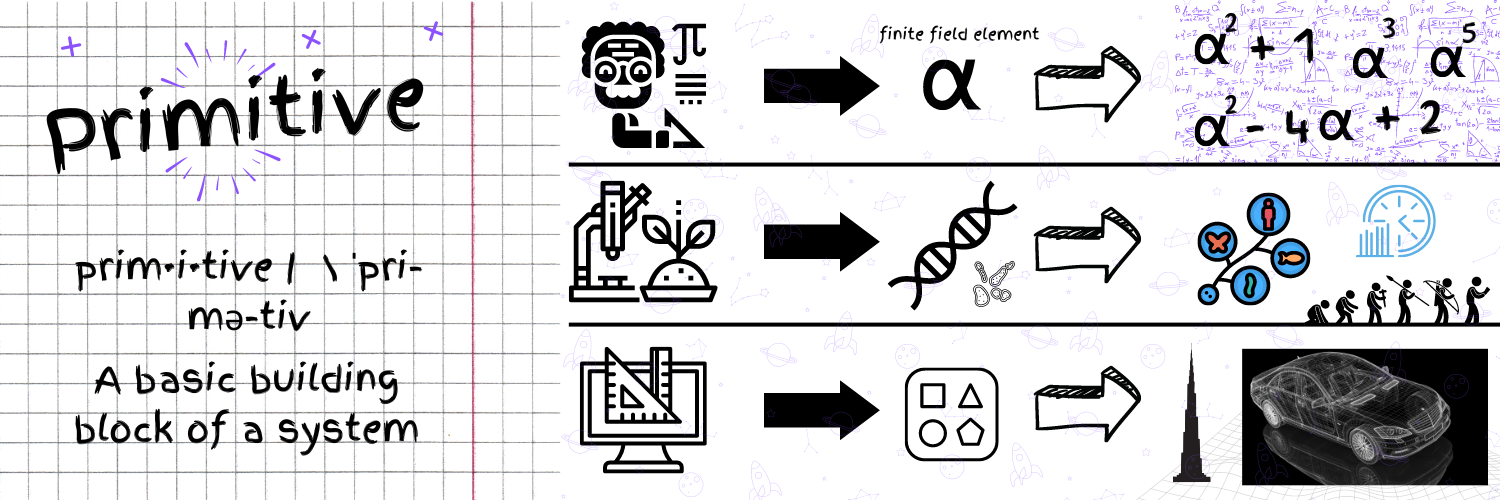

이 세가지 대답에서 어떤 걸 파악할 수 있을까요? 모든 정의는 하나의 공통점을 갖는 것처럼 보입니다. 궁극적으로 그들이 정의하는 프리미티브는 더 복잡한 요소를 만들기 위한 쌓기 블록 역할을 하는 **기본 요소**입니다.

이제 일반적인 컴퓨터에서 이것의 의미를 찾는다고 하면, 우리가 무엇을 "프리미티브"라고 부를 수 있을까요? 컴퓨팅에서 언어 프리미티브의 의미를 살펴봅시다. 언어 프리미티브는 프로그래밍 언어에서 사용 가능한 가장 간단하고 더 이상 나눌 수 없는 최소의 요소로 정의됩니다. 아마 컴퓨터의 모든 것이 0과 1이 전부인 바이너리로 저장된다는 사실을 들어보셨을 겁니다. 그리고 그건 부정할 수 없는 완벽한 사실입니다. 그러나 만약 우리가 바이너리 숫자를 프로그래밍 언어의 프리미티브 구조로 설정한다면, 아마도 코딩을 하는 데에 있어서 굉장히 힘들 것입니다. 그래서 더 적절한 접근은 고급 프로그래밍 언어로 프리미티브라는 용어를 정의하는 것이 되겠습니다. 이 방법대로 _더 이상 나눌 수 없는_ 것으로 분류를 한다면 프로그래밍을 하고 이를 이해하는데 더 쉬울 것입니다.

이에 관한 언어 프리미티브 개념의 좋은 예시는 바로 프리미티브 데이터 타입입니다. 어떤 언어를 고르는지에 따라 일반적으로 더 이상 나눌 수 없는 데이터 타입을 가지게 될 것이고, 이것은 사용하고자 하는 의도에 기초해 더 복잡한 데이터 타입을 만드는 데에 사용될 것입니다. 예를 들어: `int` 와 `float`, `string`, `boolean` 은 _일반적으로_ 파이썬에서 프리미티브라고 여겨집니다. 반면에, 파이썬에서 **문자열 배열** 이나 **이름이 들어있는 리스트**, **십진법 좌표의 튜플**, **정수의 세트** 는 모두 프리미티브 데이터 타입이 아닙니다. 단지 프리미티브 데이터 타입으로 만들어진 것들입니다.

그럼 이제 프로그래밍에서 일반적인 함수를 같은 방법으로 정의할 수 있을까요? 어떻게 사용하는지에 따라 더 복잡하고 정교한 프로그램 요소나 인터페이스를 위한 코드의 기초 인터페이스나 세그먼트를 프리미티브 함수로 정의할 수 있을 것입니다.

## 그럼 Quantum이랑은 어떤 관련이 있나요?

언어 프리미티브와 관련해 위에서 설명했던 대로, 비록 컴파일했을 때 바이너리 숫자나 기계어가 기술적으로는 코어 프리미티브 구조라는 것을 알고 있다고 해도, 기계어를 쓰는 낮은 수준이 아닌 보다 접근하기 쉬운 프로그램을 만들 수 있도록 범주화를 통해 상위 수준의 프리미티브 용어를 정의합니다. 대부분 우리는 가장 주요한 컴파일 언어가 효율적인 컴파일 루틴을 내장하고 있을 것을 기대합니다. 그리고 이를 고려했을 때 우리는 현재 시스템에 대해 최적화가 되어 있는 실행 워크플로를 기대하므로 상하고 프로그래밍 언어에서 미리 정의된 프리미티브와 문법을 사용해 프로그램을 창조할 수 있습니다.

**이제 Quantum과 관련된 질문입니다: 양자 계산 루틴이나 워크플로를 위한 구조를 이와 같이 정의하는 방법이 있을까요?**

## Qiskit Runtime Primitives 소개:

![Qiskit Runtime 구조](https://cloud.ibm.com/docs-content/v1/content/fe08b8e3a114015612ab3ed112afa281d6ce896a/quantum-computing/images/Qiskit_Runtime_architecture.png)

주로 클라우드의 QPU인 주어진 _Quantum 워크플로_ 를 최대화하기 위해, 대규모의 효율적인 실행으로 워크로드를 최적화하도록 구축된 서비스를 준수하는 컴퓨팅 프로그래밍 모델을 가집니다. 작년부터 Qiskit Runtime 서비스는 컨테이너화된 실행을 컨셉으로 만들어졌습니다; 여러 계산 요소가 패키지화되어 어떤 시스템에서든 간편하게 실행되는 실행 모델을 뜻합니다. 클라우드에 각각의 회로를 보내는 대신 전체 프로그램은 종속된 프로그램과 함께 패키지화되어 클라우드 상에서 실행됩니다. 이를 통해 지연 시간을 절약하고 반복 루프에 대한 오버헤드를 줄입니다.

새로 업데이트된 Qiskit Runtime 서비스에서는 단순히 Runtime 서비스의 새로운 기능이 아닌, Qiskit Runtime 서비스의 인터페이스로 작동하는 새로운 프로그래밍 모델의 도입으로 더 확장된 프로그래밍 경험에 집중하였습니다: 바로 **Qiskit Runtime Primitives**의 등장입니다!

## Qiskit Runtime Primitives: Sampler와 Estimator 소개

양자를 위한 primitives 정의를 시작하기 위해 두 가지 후보자(현재 시점 기준)를 소개합니다. 비록 양자 계산 과정을 위해 기초 요소를 정의할 몇 가지 방법이 있다고 할지라도, 이 primitive 구조에 앞으로도 더 많은 추가 사항이 있을 것입니다. 다만 현 시점에서 정의하는 두 개의 primitive 정의는 이렇습니다.

여기서 고전 컴퓨터와 구별되는 양자컴퓨터의 핵심 기능은 출력에서 비고전적 확률 분포를 생성하는 능력입니다. 얻은 매우 확률적인 계산 결과의 고유한 특성으로 인해 확률 분포의 형태로 사용 가능한 정보를 생성하기 위해 동일한 회로에 대해 여러 번 실행해야 합니다. 확률 분포로 할 수 있는 기본 계산은 샘플링하거나 수량을 추정하는 것입니다.

주목할만한 두 핵심 포인트는 **1) 확률 분포를 샘플링**한다는 것과 **2) 값을 추정**할 수 있다는 것입니다. 우리는 각각의 기능에 적절한 두 primitives의 이름을 붙여줄 것입니다. 바로 **Sampler**와 **Estimator**로 말이죠!

### Sampler

Sampler는 본질적으로 이름이 포함하는 것과 동일합니다. 결과를 샘플링함으로 주어진 양자 회로의 전체적인 quasi-probability 분포를 추정합니다. 사용자의 회로를 입력으로 받아 quasiprobabilities의 에러-완화 readout을 생성하는 프로그램이라고도 할 수 있습니다. 이는 사용자에게 에러 완화를 사용한 샷 결과를 평가하는 더 나은 방법을 제공하고, 상쇄 간섭의 관점에서 여러 개의 연관된 데이터 값의 확률을 더 효율적으로 평가할 수 있게 합니다.

즉, 회로를 실행할 때 얻은 익숙한 "counts"의 결과와 매우 비슷하지만 Sampler는 오류 완화 루틴의 결과로 준 확률 분포(quasi-probability distribution)의 출력을 얻을 수 있습니다.

간단히 말하면, 보다 넓은 범위의 정보 데이터를 자유롭게 사용할 수 있게 되는 것을 의미합니다. 준 확률 분포의 표현에서 얻은 정보는 진정한 확률 분포와의 유사도를 조사하거나샘플링 오버헤드와 교환하여 편향되지 않은 기대 값 포인트를 계산하는 데 더 관련이 있을 수 있습니다. 이러한 분포는 어떤 의미에서 진정한 확률처럼 행동하지만, 다른 점은 원래 이론의 제약이 몇 가지 완화된다는 것입니다. 그 중 하나는 "음수의" 확률을 나타내는 음의 데이터 포인트가 존재할 가능성입니다 (그러나 집합적으로 합이 1이 될 수 있음). 준확률 분포를 실제 확률로 오해해서는 안되며 사용 상황에 따라 특정 오류 범위까지 가장 가까운 실제 확률 분포로 추정할 수 있습니다. 샘플러를 활용할 수 있는 몇 가지 사용 사례는 Grovers 검색, QSVM 루틴, 안정기 계산, 최적화 루틴 등입니다.

샘플러는 전체 출력에 대한 완전한 분포를 제공하지만 사용자는 특정 결과에 대한 정보에만 관심이 있을 수 있으며 이런 분들을 위해 **Estimator**를 살펴보겠습니다!

### Estimator

Estimator는 대상 연산자의 기대값을 계산하고 해석합니다. 회로와 관측가능량(observable)을 입력으로 받아 회로와 관측가능량 사이를 선택적으로 그룹핑하여 실행하고 주어진 파라미터 입력에 대한 기대치와 분산을 효율적으로 평가하는 프로그램 인터페이스입니다. 이 Primitive를 사용해 많은 알고리즘에서 필요한 양자 연산자의 기대값 계산과 해석을 효율적으로 수행할 수 있습니다.

주어진 문제에 대한 최종 솔루션을 찾는 것이 주요 목표인, 전체 측정값의 분포를 알 필요가 없는 사람들에게는 Estimator 프리미티브가 더 유용합니다. 이 루틴은 기본적으로 대부분의 현재의 양자 알고리즘에 유용하게 사용할 수 있습니다.  가장 일반적인 예로는 알고리즘의 변분 클래스를 들 수 있습니다. Estimator는 회로 외에 양자 관측가능량의 기대값을 계산하므로 반드시 입력에 넣어주어야 합니다. 여기에서 관측가능량은 분자의 전자 구조, 최적화 문제에 대한 비용 함수 등과 같은 다양한 항목을 인코딩하여 넣을 수 있습니다.

## Qiskit Runtime를 사용하는 이유

그렇다면 왜 이 새로운 프로그래밍 패러다임이 중요할까요? 답은 Qiskit Runtime 서비스의 인터페이스와 그 위에 구축된 강력한 서비스와 프레임워크를 활용하기 위함입니다.

Section 1에서는 최적화된 워크플로우를 실현하기 위해 컴파일러에 의존하면서 보다 높은 수준의 개발을 가능하게 하는 언어 프리미티브를 정의했지만 Runtime은 다음과 같은 일반적인 분야에서의 활약을 기대됩니다:

- **효율** : 양자 백엔드를 위해 설계된 반복적인 워크로드를 위한 고도로 최적화된 루틴 및 옵션
- **지연 시간** : Sessions 프레임워크를 사용하여 스케줄링, 작업 우선 순위 지정 및 공유 캐싱을 통해 대기 시간을 줄이고 결과를 얻는 시간을 단축함.
- **일관성** : 기존의 Primitive 모델을 보완하는 새로운 추가 기능으로 서비스 전반에 걸쳐 복잡한 루틴을 구축하는 일관된 프로그래밍 모델
- **커스터마이징 가능성** : 작업의 컨텍스트 및 매개변수를 기반으로 하는 맞춤형 회로로 반복적인 루틴 관리
- **오류 완화 및 억제** : 양자 정보의 품질 향상을 위해 간단하고 추상화된 인터페이스를 통한 쉬운 오류 완화 및 억제 기능의 향상

Qiskit Runtime 서비스를 사용하면 앞서 설명된 Primitive 프로그래밍 모델들을 사용하여 이러한 이점을 즉시 활용할 수 있습니다. 이 노트북은 Sessions 프레임워크와 함께 Sampler 및 Estimator 프리미티브를 사용하는 방법을 소개하고 현재 사용 가능한, 그리고 계속 개발 중인 몇 가지 오류 완화 전략을 보여줍니다. 뒤를 이은 노트북들은 이 곳에서 학습한 내용을 기반으로 Primitive 프로그래밍 모델을 활용하여 기계 학습, 최적화 및 화학 영역에서 보다 일반적인 알고리즘 루틴을 구축하는 방법에 대한 것이 될것입니다.

Qiskit Runtime 서비스를 사용하여 Primitive 구조를 기반으로 프로그램을 작성하는 방법을 살펴보겠습니다.

###  필수 라이브러리 불러오기

In [ ]:
import time
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit.tools.visualization import plot_histogram
# %config InlineBackend.figure_format='retina'

# 파트 II: Getting Started with Qiskit Runtime

Qiskit Runtime을 시작해 봅시다. Qiskit Runtime은 여러분이 속한 IBM Quantum Challenge의 IBM Quantum Lab 인스턴스에 이미 설치 및 설정되어 있습니다.

로컬 시스템에서 실행 중인 경우 `pip install qiskit-ibm-runtime`을 사용하여 최신 버젼의 Qiskit Runtime 패키지를 설치합니다. IBM Quantum Challenge 포털을 통해 IBM Quantum Lab으로 이동했다면 모든 것이 이미 설정되어 있을 것입니다.

가장 먼저 시작할 일은 프로그램을 실행할 `QiskitRuntimeService` 인스턴스를 정의하는 것입니다. 이 인스턴스를 사용하여 필요에 따라 현재 사용 가능한 두 개의 프리미티브 - `Sampler` 및 `Estimator`를 호출하고 Qiskit Runtime에서 실행할 수 있습니다.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator

아래 블록은 현재 환경의 여러분의 런타임 계정 자격 증명을 저장합니다. `channel` 키워드 인수를 사용하여 런타임에 일반 IBM Quantum(`channel='ibm_quantum'`) 또는 IBM Cloud(`channel='ibm_cloud'`)의 계정 자격을 사용 할 것인지를 전달할 수 있습니다. 챌린지를 위해서는 모든 Runtime 실행에 `ibm_quantum` 채널을 사용할 것입니다. 이 셀은 해당 환경에 대한 자격 증명을 저장하기 위해 딱 한번만 실행해도 충분합니다. 그리고 `token` 키워드 인수의 경우 API 토큰 값은 **[quantum-computing.ibm.com/account](https://quantum-computing.ibm.com/account)** 링크에서 찾을 수 있습니다.

IBM Quantum Lab에 있는 경우에는 이후의 실행에서 channel만 지정하여 `QiskitRuntimeService`를 호출할 수 있습니다.


In [ ]:
# Save the Runtime account credentials if you have not done so already
# If you need to overwrite the account info, please add `overwrite=True`
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='my_token', overwrite=True)

In [ ]:
service = QiskitRuntimeService(channel='ibm_quantum')

이제 서비스가 설정되었으므로 액세스 권한이 있는 모든 백엔드를 확인해 봅시다. 아래 명령을 실행하여 Qiskit Runtime을 활용할 수 있는 사용 가능한 모든 백엔드를 표시해 보겠습니다.

In [ ]:
service.backends()

# 파트 III: How to Use Primitives

Primitive를 사용하는 방법을 알아봅시다. 먼저 살펴볼 첫 번째 Primitive는 Sampler Primitive입니다. 먼저 세션의 개념에 대해 알아봅시다:

클라우드에서 Primitive를 사용하려면 세션을 안전하게 열고 닫기 위해 컨텍스트 관리자를 사용해야 합니다. 이것은 생성자가 관련 매개변수와 Sampler 및 Estimator 메서드를 사용하여 대기열의 작업을 전달하는 `Session` 키워드를 사용하여 수행됩니다. 이러한 세션 또는 팩토리의 개념을 사용하면 작업을 양자 컴퓨터에 대한 반복 호출의 모음으로 정의할 수 있습니다. 세션을 시작하면 사용자가 보내는 데이터를 캐시하므로 각 반복 작업 마다 Quantum Datacenter로 전송할 필요가 없습니다. `Options`을 사용하여 현재 세션과 해당 매개변수를 구성하고 실행 환경을 제어합니다. 이 방식을 사용하면 광범위하고 다양한 Primitive 프로그램을 한번에 호출할 수 있습니다.  

아래의 예제에서 Bernstein-Vazirani 알고리즘을 사용해 Primitive 사용하는 방법을 배워봅시다.


# 3.1 Sampler 예제

### Bernstein-Vazirani 알고리즘

이 알고리즘은 양자컴퓨터가 더 복잡한 문제를 푸는 계산 도구로써 유용할 수 있다는 것을 보여준 특별한 양자 알고리즘 중 하나입니다.

문자열 길이가 $ n $ 인 숨겨진 비트 스트링 $ s $ 와 입력값의 비트곱 결과를 반환하는 함수가 있습니다:

$$ f(x) = s ⋅ x (\mathrm{mod} 2) $$

숨겨진 비트 스트링을 찾기 위해서는 함수 $f$ 를 $ n $ 번 호출해야 합니다. 그러나 양자컴퓨터를 사용한다면 **단 한 번**의 호출만으로도 100%의 신뢰도로 이 문제를 풀 수 있습니다. 숨겨진 비트 스트링을 찾기 위한 양자 Bernstein-Vazirani 알고리즘을 만드는 방법은 간단합니다:

1. 입력 큐비트를 상태 $|0\rangle^{\otimes n}$ 로, 출력 큐비트를 상태 $|-\rangle$ 로 초기화합니다.
2. 하다마드 (Hadamard) 게이트를 각각의 입력 큐비트에 적용합니다.
3. 오라클에 물어봅니다.
4. 하다마드 (Hadamard) 게이트를 각각의 입력 큐비트에 적용합니다.
5. 측정합니다.

Bernstein-Vazirani 알고리즘에 관한 더 자세한 정보는 Qiskit 텍스트북의 다음 유용한 챕터를 확인해주십시오: **https://learn.qiskit.org/course/ch-algorithms/bernstein-vazirani-algorithm**. 또는 Qiskit 유튜브의 Coding with Qiskit 시즌 1의 6화를 참고하십시오: **[Bernstein-Vazirani Algorithm](https://youtu.be/sqJIpHYl7oo)**.

아래에서 숨겨진 비트 스트링 "001" 을 찾기 위한 Bernstein Vazirani 알고리즘의 예시를 확인할 수 있습니다.

In [ ]:
hidden = "001"
print(len(hidden))

이 숨겨진 스트링을 이 알고리즘에 구현하기 위해 3개의 입력 큐비트와 1개의 출력 큐비트가 필요합니다.

In [ ]:
# Make a quantum circuit
qc = QuantumCircuit(4, 3)
display(qc.draw(output="mpl"))

1단계. 입력 큐비트를 상태 $|0\rangle^{\otimes n}$ 로, 출력 큐비트를 상태 $|-\rangle$ 로 초기화합니다.

가장 먼저 모든 큐비트를 상태 $|0\rangle$ 로 초기화해야하므로 입력 큐비트에는 어떤 게이트도 적용할 필요가 없습니다. 그러나 출력 큐비트는 상태 $|-\rangle$ 로 바뀌어야 하기 때문에 X-게이트와 H-게이트 (하다마드 게이트) 를 차례대로 적용할 것입니다.

In [ ]:
qc.x(3)
qc.h(3)
display(qc.draw(output="mpl"))

2단계. 하다마드 (Hadamard) 게이트를 각각의 입력 큐비트에 적용합니다.

각각의 입력 큐비트에 하다마드 게이트를 적용할 것입니다.

In [ ]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

3단계. 오라클에 물어봅니다.

오라클에 물어보기 위해 CNOT 게이트를 사용할 것입니다. 숨겨진 스트링이 "001" 이기 때문에 CNOT 게이트를 큐비트 0과 출력 큐비트에 적용할 것입니다. 참고: Qiskit에서는 숫자는 **오른쪽에서 왼쪽으로** 문자열의 비트에 할당됩니다.

In [ ]:
qc.cnot(0,3)
display(qc.draw(output="mpl"))

4단계. 하다마드 (Hadamard) 게이트를 각각의 입력 큐비트에 적용합니다.

다시 한 번 각각의 입력 큐비트에 하다마드 게이트를 적용할 것입니다.

In [ ]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

5단계. 측정합니다.

모든 입력 큐비트를 [`measure`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html) 메소드를 이용해 측정할 것입니다.

In [ ]:
qc.measure(range(3), range(3))
display(qc.draw(output="mpl"))

시뮬레이터에서 실행하기 위한 회로 준비가 끝났습니다. 아래의 셀을 실행하여 결과를 확인할 수 있습니다.

In [ ]:
# Use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(qc).result()
answer = results.get_counts()

print(answer)

결과를 보면 가장 처음에 설정해둔 숨겨진 스트링 "001" 을 볼 수 있습니다.

<a id="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> 연습문제 1:</b> 
    
Bernstein Vazirani 함수를 완성해봅시다.
참고로 이 함수는 숨겨진 스트링이 될 단 하나의 매개변수만이 존재합니다.
이 스트링은 "0" 과 "1" 로 구성되어 있습니다.
이 문제를 통과하기 위해서는 아래 코드 블록에서 어떤 문자열이 와도 잘 작동할 일반적인 함수를 만들어야 합니다.
    
</div>

In [ ]:
def bernstein_vazirani(string):
    
    # Save the length of string
    string_length = len(string)
    
    # Make a quantum circuit
    qc = QuantumCircuit(string_length+1, string_length)
    
    # Initialize each input qubit to apply a Hadamard gate and output qubit to |->
    
    #
    #
    # build your code here
    #
    #
    
    # Apply an oracle for the given string
    # Note: In Qiskit, numbers are assigned to the bits in a string from right to left
    
    #
    #
    # build your code here
    #
    #
    
    # Apply Hadamard gates after querying the oracle
    
    #
    #
    # build your code here
    #
    #
    
    # Measurement
    qc.measure(range(string_length), range(string_length))
    
    return qc

In [ ]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex1

grade_lab1_ex1(bernstein_vazirani) # Expected result type: function

이제 위에서 정의한 함수를 이용해 Bernstein-Vazirani 회로를 만들어보겠습니다:

In [ ]:
qc1 = bernstein_vazirani('111')
display(qc1.draw(output="mpl"))

이 회로를 실행하기 전에, 언급했던 대로 단 하나의 Sampler session에서 여러 개의 회로를 실행하는 것이 가능합니다. 이를 확인하기 위해 Bernstein-Vazirani 회로를 하나 더 만들어보겠습니다.

In [ ]:
qc2 = bernstein_vazirani('000')
display(qc2.draw(output="mpl"))

### Runtime을 이용해 회로 실행하기

Qiskit Runtime에서 어떤 양자 회로를 실행하든지 본질적으로 3단계를 거쳐야 합니다.

1. 루틴을 실행하기 위한 백엔드를 설정합니다.
2. `Session`을 이용해 session 생성자를 만듭니다.
3. session 안에서 `Sampler` 또는 `Estimator` 의 primitive 인스턴스를 만듭니다.

먼저, 사용할 백엔드를 설정하겠습니다. 클라우드의 `ibmq_qasm_simulator` 를 통해 루틴을 실행하겠습니다.

In [ ]:
backend = service.backends(simulator=True)[0]
print(backend)

이제 여기서 session 생성자를 만듭니다. `Session` 은 `with` 구문과 함께 생성할 것이며, 이 session 안에서 Bernstein-Vazirani 회로를 실행하기 위해 `Sampler` 인스턴스를 정의합니다. 여기서 `with` 구문은 이전에 생성자의 초기 매개변수로 정의한 서비스를 전달하는 데에 사용되는 컨텍스트 매니저를 나타냅니다. Sampler로 작업을 제출하기 위해 `run` 메소드 안에 파라미터를 특정지어 실행합니다. 넘겨줘야할 파라미터로 `circuits` 이 있습니다: 하나의 회로를 넘겨줘도 되고 `QuantumCircuit` 의 리스트도 가능합니다. 이 구조의 가장 좋은 특징은 `Sampler` 의 메소드 run 실행 시 리스트를 바꾸기만 하면 실행하고자 하는 회로의 수를 빠르게 바꿀 수 있다는 것입니다.

In [ ]:
options = Options(simulator={"seed_simulator": 42},resilience_level=0) # Do not change values in simulator

일정한 결과를 위해 `Sampler` 의 시드를 설정할 것입니다. 위의 `options` 을 이용해 `Sampler` 객체 안에 시드를 설정할 수 있습니다. 어떻게 `Sampler` 와 함께 옵션을 사용하면 되는지는 바로 아래에서 확인할 수 있습니다:

In [ ]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc1,qc2])

sampler를 실행하고 난 다음에는 `RuntimeJob` 객체가 반환됩니다. 그리고 우리는 해당 객체로부터 `result` 메소드를 사용해 결과를 추출할 수 있습니다. 그런 다음 이 반환된 결과에서 관심 있는 개별 데이터를 선택할 수 있습니다. 자세한 내용은 여기서 확인 가능합니다: **[RuntimeJob](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.RuntimeJob.html#qiskit_ibm_runtime.RuntimeJob)**.

In [ ]:
result = job.result()

In [ ]:
result

In [ ]:
result.quasi_dists

이 결과는 각 회로로부터 얻어진 두 개의 결과를 가집니다. 첫 번째 회로 `qc1` 의 숨겨진 스트링은 `111` 이고 첫 번째 결과는 7입니다 (7은 이진수로 111). 그리고 확률은 1.0로 회로가 100% 7을 반환할 것임을 의미합니다. 같은 방식으로 두 번째 결과는 0 (0은 이진수로 000) 로 확률은 또한 1.0입니다.

위에서 볼 수 있듯이 결과는 회로를 만들 때 넘겨준 비트 스트링과 동일합니다. 아마 이게 어떻게 가능한 건지 궁금한 분들이 있으실 겁니다. 아래의 그림을 살펴봅시다:

![image](https://qiskit.org/textbook/ch-gates/images/identities_1.svg)

하나의 CNOT 게이트가 4개의 H-게이트에 둘러싸여 있고 이는 뒤집어진 CNOT 게이트와 동일합니다. 이는 킥백(또는 위상 킥백)의 예시로, 큐비트로 게이트에 의해 더해진 eigenvalue가 제어 연산자를 통해 다른 큐비트로 *킥백되는 것*입니다. 이를 이용해 Bernstein Vazirani 회로로 하여금 숨겨진 비트 스트링을 드러나게 합니다.

### 매개변수화된 회로

primitives의 주요한 장점 중 하나는 매개변수화된 회로에 여러 매개변수를 바인딩하는 것이 단순화되어있다는 것입니다. 회로에 매개변수를 어떻게 바인딩하는지나 그 예시가 궁금하다면 [**Qiskit documentation의 한 섹션으로 연결된 이 튜토리얼**](https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html#Parameterized-circuits)을 참고해주세요. 바인딩의 예시를 보기 위해 제어된 P-게이트 (위상 게이트) 를 이용한 또 다른 예시를 소개합니다. 여기서 [**P-게이트**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html)를 회전 매개변수 `theta` 로 매개변수화하도록 하겠습니다:

In [ ]:
theta = Parameter('theta')

qc = QuantumCircuit(2,1)
qc.x(1)
qc.h(0)
qc.cp(theta,0,1)
qc.h(0)
qc.measure(0,0)

qc.draw()

위에 보이는 회로는 매개변수화 된 것으로 eigenvalue가 측정을 위해 큐비트 0으로 킥백(being kicked back)되고 있습니다. 킥백되는 양은 매개변수 theta에 의해 결정됩니다. 이제 아래의 셀에서 위의 회로를 위한 매개변수를 리스트를 통해 정의하겠습니다. 여기서 매개변수는 $0$ 부터 $2\pi$ 까지의 값이 동일한 간격으로 나누어진 점 50개로 구성됩니다.

서로 다른 위상에 대한 위상 제어 게이트 회로를 살펴봅시다:

In [ ]:
phases = np.linspace(0, 2*np.pi, 50) # Specify the range of parameters to look within 0 to 2pi with 50 different phases

# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

이것을 위의 회로에 적용하기 전, bloch sphere를 사용하여 양자 상태를 시각화해 보겠습니다.

In [ ]:
# help understanding of how its phase is moving
from qiskit.visualization import plot_bloch_multivector

states = []

for i in range(0, 50, 10):
    
    temp = QuantumCircuit(2,1)
    temp.x(1)
    temp.h(0)
    temp.cp(individual_phases[i][0],0,1)
    temp.h(0)
    
    state = Statevector(temp)
    states.append(state)

In [ ]:
plot_bloch_multivector(states[0])

In [ ]:
plot_bloch_multivector(states[1])

In [ ]:
plot_bloch_multivector(states[2])

In [ ]:
plot_bloch_multivector(states[3])

In [ ]:
plot_bloch_multivector(states[4])

Y-Z 축을 따라 각각의 위상에 따른 상태가 바뀔 때마다 어떻게 회전하는지를 시각화할 수 있었을 겁니다. 이제 다음 연습문제를 통해 매개변수 리스트를 회로 `qc` 에 적용해봅시다.

<a id="exercise2"></a>
<div class="alert alert-block alert-success">
    
<b> 연습문제 2:</b> 
    
매개변수화된 회로에 매개변수를 바인딩합시다. Sampler를 이용해 위에서 만든 회로 `qc` 에 리스트 `individual_phases` 를 바인딩하면 됩니다.
정답의 타입은 [**SamplerResult**](https://qiskit.org/documentation/stubs/qiskit.primitives.SamplerResult.html)여야 합니다.
    
</div>

여기서 매개변수가 바인딩된 모든 회로를 돌리기 위해 `Sampler` 를 다시 한 번 사용할 것입니다.

`Sampler` 객체를 만들 때, 시드를 위해 `options` 매개변수를 넣어야 합니다.

`Sampler` 의 run 메소드는 다음의 매개변수를 가집니다:

>`circuits` – 하나 또는 그 이상의 회로 객체.  
>`parameter_values` – 회로에 결합될 변수들.

연습을 마무리 하기위해 아래의 코드를 완성해 보세요.

In [ ]:
options = Options(simulator={"seed_simulator": 42},resilience_level=0) # Do not change values in simulator

In [ ]:
with Session(service=service, backend=backend):    
    sampler = # build your code here
    job = # build your code here
    result = # build your code here

In [ ]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex2

grade_lab1_ex2(result) # Expected result type: SamplerResult

위의 코드 셀은 매개변수화된 회로를 가져와 런타임 서비스를 사용하여 백엔드에서 실행합니다. 이 루틴은 정의된 회로에 각 매개변수를 적용한 후 생성되는 모든 회로를 실행하여 결과를 모아서 제공합니다.

이제 우리가 얻은 결과와 이상적인 결과를 도표로 비교해 봅시다! 각각의 회로에 대해 1 상태에 있을 확률에 대한 준확률 분포를 확인해 봅시다. 각 회로는 위상 매개변수로 서로 다른 $\theta$ 값을 갖습니다.

In [ ]:
# The probablity of being in the 1 state for each of these values
prob_values = [dist.get(1, 0) for dist in result.quasi_dists]

plt.plot(phases, prob_values, 'o', label='simulator')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend();

노란색 선은 이론적으로 예상되는 결과이고 파란색 점은 백엔드에서 회로를 실행하여 얻은 값입니다. 보시다시피 대부분 이론과 일치하며 `ibmq_qasm_simulator`가 지닌 약간의 임의성으로 인해 결과 분포의 곡선에 약간의 편차가 존재함을 볼 수 있습니다.

지금까지 준확률 분포에 대해 살펴보았지만 기대값을 평가하는 관점에서도 이를 살펴볼 수 있습니다.

# 3.2: Example using Estimator

Estimator는 양자 연산자의 계산 및 평가된 기대값을 제공합니다. Estimator를 사용하려면 '측정이 없는' 회로가 있어야 합니다. 그 이유는 VQE와 같은 알고리즘을 실행할 때 Estimator가 해밀토니안을 얻는 과정에서 단일 큐비트 회전을 바인딩하기 때문이며 이로 인해 양자 회로에 측정을 포함할 수 없습니다. 

In [ ]:
display(qc.draw())

현재 회로 `qc`에는 측정이 포함되어 있으므로 `remove_final_measurements`로 이를 제거합니다.

In [ ]:
qc_no_meas = qc.remove_final_measurements(inplace=False)

In [ ]:
display(qc_no_meas.draw())


기대값을 계산하려면 회로에 대해 관찰 가능한 값을 설정해야 합니다. 이 경우 관찰 가능한 'ZZ'를 사용합니다. 관찰가능량의 길이는 회로의 큐비트 수와 동일합니다.

In [ ]:
ZZ = SparsePauliOp.from_list([("ZZ", 1)])

기대값은 아래 방정식으로 계산됩니다.

$$
\langle ZZ\rangle =\langle \psi | ZZ | \psi\rangle=\langle \psi|(|0\rangle\langle 0| -|1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle =|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2
$$

다음 셀을 실행하기 전에 위의 방정식을 잘 살펴보시길 권장합니다.

In [ ]:
options = Options(simulator={"seed_simulator": 42},resilience_level=0)

with Session(service=service, backend=backend):
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))

In [ ]:
param_results = job.result()
exp_values = param_results.values

plt.plot(phases, exp_values, 'o', label='real')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

### Hamiltonian explained

Estimator의 흥미로운 용도 중 하나는 특히 관측가능량과 관련하여 해밀턴을 계산하는 데 사용할 수 있다는 것입니다.

해밀토니안은 양자 역학 연산자로 운동 에너지와 위치 에너지를 포함한 시스템 내부의 총 에너지 정보를 가지고 있습니다. 그렇기 때문에 해밀토니안을 계산하는 것은 중요합니다. 에너지 가치를 계산할 수 있다는 것은 화학 계산에서 에너지 또는 기계 학습에서 비용을 계산할 수 있음을 의미합니다. 즉 바닥상태와 들뜸 상태를 찾아낸다고 볼 수 있어 양자물리학, 양자화학, 양자머신러닝과 밀접한 관련이 있습니다!

해밀토니안을 계산하려면 매개변수화된 회로가 필요합니다. [**Real Amplitudes**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html)를 사용하면 임의의 매개변수화 회로를 쉽게 만들 수 있습니다. 예시 코드는 아래에서 확인 가능합니다.

In [ ]:
ansatz = RealAmplitudes(3, reps=2)  # create the circuit on 3 qubits
ansatz.decompose().draw("mpl")

이 `ansatz`는 3 큐비트의 회로이고 `reps`는 2입니다. 이 경우 매개변수의 총 수는 $3 \times (2+1) = 9$개 입니다.


<a id="exercise3"></a>
<div class="alert alert-block alert-success">
    
<b> 연습문제 3:</b> 
    
특정 측정가능량에 대한 사용자 지정 해밀토니안의 기대 값을 계산하는 Estimator 루틴을 만들어 봅시다. 최종 결과는 [**EstimatorResult**](https://qiskit.org/documentation/stubs/qiskit.primitives.EstimatorResult.html)여야 합니다.

    
주요 목표는 $ \langle \psi_1(\theta) \lvert H_1 \lvert \psi_1(\theta)\rangle$, $ \langle \psi_2(\theta) \lvert H_2 \lvert \psi_2(\theta)\rangle$, 및 $ \langle \psi_3(\theta) \lvert H_3 \lvert \psi_3(\theta)\rangle$의 **5 큐비트**로 구성된 모든 회로를 계산하는 것입니다.
    
1. 총 3개의 랜덤 회로를 **[RealAmplitudes](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html)** 를 사용해 만들어 봅시다; $ \psi_1(\theta) $를 reps = 2, $ \psi_2(\theta) $  를 reps = 3, 그리고 $ \psi_3(\theta) $  를 reps = 4의 값을 사용합니다.
2. **[SparsePauliOp](https://qiskit.org/documentation/stubs/qiskit.quantum_info.SparsePauliOp.html)** 를 사용해 해밀토니안을 만듭니다:
    - $ H_1 = X_1Z_2 + 3Y_0Y_4 $
    - $ H_2 = 2X_3 $
    - $ H_3 = 3Y_2 + 5Z_1X_3 $
3. **[numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)** 를 사용해 0과 1사이의 균일한 간격의 값으로 구성된 리스트를 만듭니다. 매개변수의 수는 각 회로의 `reps`마다 다름을 기억하세요.
4. 셀에 정의된 `options`과 함께 Estimator를 사용하여 각 기댓값을 계산합니다.
</div>

In [ ]:
# Make three random circuits using RealAmplitudes

psi1 = # build your code here
psi2 = # build your code here
psi3 = # build your code here


In [ ]:
# Make hamiltonians using SparsePauliOp

H1 = # build your code here
H2 = # build your code here
H3 = # build your code here


In [ ]:
# Make a list of evenly spaced values for theta between 0 and 1

theta1 = # build your code here
theta2 = # build your code here
theta3 = # build your code here


In [ ]:
# Use the Estimator to calculate each expectation value

with Session(service=service, backend=backend):
    
    options = Options(simulator={"seed_simulator": 42}, resilience_level=0) # Do not change values in simulator
    
    estimator = # build your code here
    
    # calculate [ <psi1(theta1)|H1|psi1(theta1)>,
    #             <psi2(theta2)|H2|psi2(theta2)>,
    #             <psi3(theta3)|H3|psi3(theta3)> ]
    # Note: Please keep the order
    job = # build your code here    
    
    result = # build your code here

In [ ]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex3

grade_lab1_ex3(result) # Expected result type: EstimatorResult

# 파트 IV: Introduction to Error Mitigation and Error Suppression on Qiskit Runtime 

앞서 언급했듯이 Qiskit Runtime 서비스는 획득한 정보의 품질을 높이기 위해 오류 완화 및 오류 억제 루틴을 사용할 수 있습니다.

현 시대에 양자 컴퓨터는 **노이즈** 의 영향을 받습니다. 양자 컴퓨팅에서 잡음 및 결맞음의 영향을 줄이거나 해결하기 위해 오류 수정은 일반적으로 인코딩 수준에서 이러한 잡음 효과의 영향을 완전히 무효화하려는 접근 방식으로 받아들여지고 있습니다. 효과적이기는 하지만 이러한 오류 수정 프로토콜은 내결함성 계산 시스템을 달성하기 위해 오류 수정 코드를 구현하는 과정에서 양자 리소스와 기존 리소스 모두의 막대한 오버헤드를 요구한다는 점에서 매우 까다롭습니다.

이 오버헤드는 큐비트 수, 제어된 오류율, 추가되는 회로 깊이 및 측정과 같은 제한으로 인해 현재 NISQ 시대의 시스템에서 실제로 실현 가능하지 않습니다. 따라서 지금 우리가 할 수 있는 일은 엄청난 양의 리소스를 사용하여 노이즈를 완전히 제거하는 대신 훨씬 적은 오버헤드로 노이즈의 효과를 **줄이는** 것입니다. 이러한 기술을 오류 완화 및 오류 억제라고 하며 하드웨어로 인한 오류를 완전히 제거하는 것이 아니라 줄이는 데 중점을 둔 일련의 최신 기술입니다. 이러한 개념의 구별에 대한 명확한 설명을 제공하는 IBM Research **[블로그의 기사](https://research.ibm.com/blog/quantum-error-suppression-mitigation-correction)** 를 소개합니다.

Qiskit Runtime에는 서비스에 내장된 많은 최신의 잘 알려진 오류 완화 및 오류 억제 전략들이 있습니다. 또한 쉽게 사용할 수 있는 높은 레벨의 레이어를 사용하는 Primitive와 통합되어 있어 원하는 대로 활성화 및 비활성화할 수 있습니다!

이 기술의 첫 번째 예에서는 Qiskit Runtime: M3 on Sampler의 오류 완화 방법을 소개합니다.

# 4.1 Error Mitigation with Sampler

`Sampler`를 사용하면 **[M3 오류 완화 루틴](https://arxiv.org/pdf/2108.12518.pdf)** 을 활용하여 더 나은 품질의 데이터를 얻을 수 있습니다. 일반적으로 오류 완화 전략은 전략에 따라 몇 가지 추가 옵션과 함께 `resilience_level` 매개변수를 사용하여 활성화 할 수 있습니다.

M3를 활성화 하기 위해 `Options`에 `resilience_level=1`을 설정하여 M3를 적용하고 실행시킵니다. 이 과정을 실습해 봅시다.

### M3

초기화 노이즈가 최소인 표준 상황에서 $N$ 큐비트에 대한 측정 오류는 고전적으로 처리되어 다음을 만족시킵니다:

$$ \vec{p}_{noisy} = A\vec{p}_{ideal} $$

이때 $\vec{p}_{noisy}$는 양자 시스템이 반환하는 노이즈 확률의 벡터이며, $\vec{p}_{ideal}$는 측정 에러가 없는 경우의 확률, $A_{row,col}$ 는 $2^N \times 2^N$ 크기의  완전 할당 행렬이며, 여기서 $A$의 각 요소는 측정 오류 프로세스에 의해 비트 문자열 $col$이 비트 문자열 $row$로 변환될 확률입니다. $A$를 계산하기 위해서는 $2^N$ 회로를 실행해야 하며, 대부분의 경우 $\mathcal{O}(N)$ 교정 회로를 사용하여 여러 큐비트의 오류를 잘 근사할 수 있습니다. **[[1]](https://arxiv.org/pdf/2108.12518.pdf)**

M3는 M3(matrix-free measurement mitigation) 루틴과 같이 할당 행렬 또는 그 역을 명시적으로 형성할 필요가 없는 확장 가능한 양자 측정 오류 완화를 위한 패키지입니다.

![truncation](https://qiskit.org/documentation/partners/mthree/_images/truncation.png)

M3은 수정되어야 하는 잡음이 있는 입력 비트열에 의해 정의된 축소된 부분 공간에서 작동합니다. 고유 비트열의 수가 전체 다중 큐비트 힐베르트 공간의 차원보다 훨씬 작을 수 있기 때문에 결과 선형 방정식 시스템은 실질적으로 풀기가 훨씬 수월해집니다.

$$ (\tilde{A})^{-1}\tilde{A}\vec{p}_{ideal} = (\tilde{A})^{-1}\vec{p}_{noisy} $$

이 선형 방정식은 보통의 컴퓨팅 리소스만 사용하여 LU 분해를 사용하여 쉽게 풀 수 있는 경우가 많습니다. 그러나 고유한 비트스트링의 수가 많고 메모리 제약 조건이 매우 빡빡한 경우 사전 조건화된 반복 선형 솔루션 방법(예: 일반화 최소 잔차(GMRES) 또는 이중접합 구배 안정화(BiCGSTAB) 방법)을 사용하여 행렬이 없는 방식으로 문제를 해결할 수 있습니다. **[[2]](https://qiskit.org/documentation/partners/mthree/index.html)**

## Running on noisy simulators

이 오류 완화 기술이 어떻게 작동하는지 보기 위해 노이즈 시뮬레이터를 사용할 것입니다. 시뮬레이터에서 잡음이 있는 시나리오를 시뮬레이션하기 위해 잡음 모델을 `ibmq_qasm_simulator`에 전달합니다. `fake_provider`의 `FakeBackend`를 사용하여 노이즈 모델을 생성하고 이를 `simulator` 옵션 매개변수로 전달하는 방식을 사용해 보겠습니다.

Fake 백엔드는 시스템의 특정 시점의 스냅샷을 사용하여 IBM Quantum 시스템의 동작을 모방하도록 구축됩니다. 시스템 스냅샷에는 시스템의 노이즈 시뮬레이션을 수행하는 데 유용한 커플링 맵, 기본 게이트, 큐비트 속성(T1, T2, 오류율 등)과 같은 양자 시스템에 대한 중요한 정보가 포함되어 있습니다. **[[3]](https://qiskit.org/documentation/apidoc/providers_fake_provider.html)**

실행 옵션을 나타내기 위해 관련 매개변수를 사용하여 `Options` 클래스의 인스턴스를 정의하여 각 실행에 대한 기본값을 정의합니다.

이 연습에서는 두 가지 `Options`의 세트를 정의할 것입니다. noise_model만 있는 `Options`는 오류 완화가 없는 정상적인 실행을 나타내고 `resilience_level` 옵션이 `1`로 설정된 `options_with_em`은 오류 완화가 활성화된 작업을 나타냅니다. 만들어 둔 옵션 세트들은 `Sampler` 객체를 인스턴스화할 때 추가하여 사용합니다.

`Options` 인스턴스를 만드는 방법은 아래에서 확인할 수 있습니다.

In [ ]:
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel

# Import FakeBackend
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

# Set options to include noise_model
options = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },
    resilience_level=0)

# Set options to include noise_model and resilience_level
options_with_em = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    resilience_level=1
)

Sampler에서는 Resilience level을 1로 설정하면 M3가 활성화 됩니다. 아래 코드를 실행하여 M3의 효과를 눈으로 확인해 봅시다.

In [ ]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values = [1-dist[0] for dist in param_results.quasi_dists]
    
    sampler = Sampler(options=options_with_em)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values_with_em = [1-dist[0] for dist in param_results.quasi_dists]

In [ ]:
plt.plot(phases, prob_values, 'o', label='noisy')
plt.plot(phases, prob_values_with_em, 'o', label='mitigated')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend();

### DD

DD(Dynamic Decoupling)는 양자 정보의 수명을 늘리는 데 사용됩니다.

큐비트가 유휴 상태인 경우 결어긋남(decoherence)으로 인해 주변 환경으로 정보가 누출되어 noisy해집니다. 이러한 유휴 상태를 방지하기 위해 소위 짝풀림(decoupling) 방법을 사용하여 주변 환경과 효과적으로 분리합니다. 유휴 시간 동안 회로를 스캔하고(즉, 지연 명령이 포함된) 해당 지점에 DD 게이트 시퀀스를 삽입합니다. 이러한 게이트는 아이덴티티 동작에 해당하므로 회로의 논리적 연산을 변경하지 않지만 이러한 유휴 기간의 결맞음 현상을 완화하는 효과가 있습니다. 그러나 이 기술은 펄스의 길이가 유한하고 완벽한 회전 연산을 구현하지 않기 때문에 적절한 DD 시퀀스를 사용하지 않으면 상황이 더 나아지지 않을 수 있습니다. 결과적으로 큐비트 일관성을 유지하는 하기보다는 파괴하지 않는 최적의 디커플링 시퀀스를 찾는 것이 중요합니다.

![DD circuit](https://qiskit.org/documentation/_images/qiskit.transpiler.passes.DynamicalDecoupling_1_0.png)

위의 회로에서 유휴 순간에 있는 X 게이트를 볼 수 있습니다. X-gate를 두 번 적용하는 것은 아이덴티티 게이트와 동일하므로 논리적으로 변화가 일어나지 않습니다.

DD의 자세한 내용은 **[이곳](https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.DynamicalDecoupling.html)** 을 참고하세요. **이 기능은 Qiskit Runtime에 기본적으로 활성화되어있음**을 기억하세요.

# 4.2 Error Mitigation with Estimator

Sampler는 현재 오류 완화 전략으로 M3를 사용하고 있지만, Estimator를 사용하면 여러가지 오류 완화 전략을 활성화할 수 있습니다. 현재 **Twirled Readout Error eXtinction(T-REX)**, **Digital Zero-noise Extrapolation(ZNE)** 및 **Probabilistic Error Cancellation(PEC)** 을 `resilience_level`의`Options`을 설정함으로써 사용할 수 있습니다.  We shall be looking into T-REX as a demonstration in this notebook and add in an optional section if you wish to play around with other resilience levels


### T-Rex

T-REX는 **Twirled Readout Error eXtinction**의 약자로 게이트의 "비틀음"을 포함하는 구현입니다. 노이즈를 완벽한 회로에 추가되는 확률적 게이트 세트로 간주한다면 twirling은 회로를 실행할 때마다 무작위로 선택된 게이트("twirling set")와 이 노이즈 게이트 세트를 결합한다는 의미로 이해할 수 있습니다. 이때 무작위로 선택하는 게이트 세트를 Pauli 연산자 세트로 선택하려면 이를 "Pauli twirling"이라 부르며 이것이 일반적으로 가장 많이 사용하는 twirling 기술 중 하나입니다.

Pauli twirling은 얽힘 게이트 전후에 Pauli 게이트 쌍(I, X, Y, Z)을 삽입하여 전체 단일 요소는 동일하지만 구현 방식이 다른 무작위 컴파일의 한 형태입니다. 이것은 결맞음(coherent) 오류를 확률적 오류로 바꾸는 효과가 있으며, 이는 충분한 평균화에 의해 제거될 수 있습니다. 이 방식은 평균화를 위해 여러 번 수행됩니다. 참고: 현재 모든 오류를 취소하기에 충분한 기저 세트를 사용하지 못하고 있을 수 있습니다. **[[4]](https://github.com/qiskit-research/qiskit-research/blob/main/docs/getting_started.ipynb)**


옵션에서 `resilience_level=1`을 설정하여 `Estimator`에서 T-REX를 활성화하여 사용할 수 있습니다.

Estimator를 사용하는 경우, Digital ZNE를 오류 완화를 적용하기 위한 옵션 중 하나로 고려할 수도 있습니다.

### Digital ZNE (Zero Noise Extrapolation)

디지털 제로 노이즈 외삽(Digital Zero Noise Extrapolation , ZNE)은 추가적인 양자 리소스 없이 노이즈가 많은 양자 컴퓨터의 오류를 완화하기 위한 널리 사용되는 기술입니다. 양자 프로그램은 다양한 프로세서 노이즈 수준에 따라 실행되도록 변경됩니다. 계산 결과는 무소음 수준에서 추정된 값으로 외삽됩니다.

적절한 값을 찾기 위해 Digital ZNE는 먼저 위에서 설명한 대로 노이즈를 스케일링합니다. 스케일링에는 아날로그와 디지털의 두 가지 방법이 있습니다. 각 방법에 대한 자세한 설명은 아래에서 확인하실 수 있습니다. 어떤 방법을 사용하는 것이 가장 좋은지에는 활발히 연구되고 있는 주제입니다. 디지털 방식은 물리적인 양자 펄스에 작용하지 않는다는 점에 유의하십시오.

- Pulse stretching (analog): 회로의 물리적 펄스를 가져와서 더 긴 시간에 대해 늘인것 같은 동일한 효과의 것을 적용. 원칙적으로 동일한 회로이지만 유효 노이즈가 증가합니다. **[[5]](https://arxiv.org/pdf/1612.02058.pdf)**
- Local folding (digital): 입력회로를 더 많은 숫자의 게이트로 컴파일 합니다. 각각의 게이트 $G$는 $G$-$G^\dagger$-$G$로 변환됩니다. 시뮬레이터를 사용중이라면 아무 변화가 없지만, 실제 백엔드를 사용중이라면 노이즈가 증가합니다.
- Global folding (digital): 로컬 폴딩과 같은 방식으로 작동하지만 대신 이 방식을 전체 회로에 적용합니다.

현재 Qiskit runtime에서는 `resilience level` 을 `2` 로 설정하면 활성화되는 Digital ZNE의 구현이 되어 있습니다.

In [ ]:
# Set options to activate T-Rex Error Mitigation module
options_with_em = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    resilience_level=1 # You may change the value here. resilience_level = 1 will activate TREX
)

In [ ]:
with Session(service=service, backend=backend):    
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values = param_results.values
    
    estimator = Estimator(options=options_with_em)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values_with_em = param_results.values

In [ ]:
plt.plot(phases, exp_values, 'o', label='noisy')
plt.plot(phases, exp_values_with_em, 'o', label='mitigated')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

T-REX를 선택할 때마다 결과가 변경될 수 있음을 눈치 채셨나요. 이는 twirling에 대해 선택된 게이트 세트가 매번 다르기 때문에 이 임의성이 결과에 기여하기 때문입니다.


### 선택사항: 더 높은 resilience levels (베타)

Qiskit runtime의 resilience level은 에러에 대한 회복력의 정도를 정할 수 있는 측정 기준입니다. 더 높은 레벨은 조금 더 긴 프로세싱 시간을 써서 더 정확한 결과를 생성합니다. Qiskit runtime의 더 높은 resilience level을 활성화할 수 있지만 **현재 이 기능은 베타 버전**이라는 것을 알아두세요. 그래서 결과가 예상했던 것처럼 나오지 않을 수 있지만 실험해보는 것은 자유입니다!

- `resilience_level=2` 은 **제로 노이즈 외삽 (ZNE) 방법**을 사용합니다. 다른 노이즈 요소 (amplification stage) 관측가능량의 기댓값을 계산하고 제로 노이즈 극한의 이상적인 기댓값을 추론하기 위해 측정된 기댓값을 사용합니다 (extrapolation stage). 이 방법은 기댓값의 에러를 줄이는 경향이 있지만 편향이 없는 결과라는 것을 보장하지는 못합니다.
- `resilience_level=3` 레벨 3은 **Probabilistic Error Cancellation (PEC)** 방법을 가능하게 합니다. 이 방법은 희소 노이즈 모델을 학습하고 반전하여 관련된 노이즈를 찾아 에러를 완화합니다. PEC는 학습된 노이즈 모델이 완화된 시점의 실제 노이즈 모델을 충실히 나타내주는 한 편향 없는 기댓값 추정치를 반환합니다.

Qiskit Runtime primitive는 특히 PEC의 구현은 스스로의 역인 2-큐비트 게이트의 노이즈를 해결합니다. 그래서 처음에는 각각의 입력 회로를 동시 1-큐비트 게이트에서 동시 2-큐비트 게이트 레이어로 이어지는 교대 순서로 계층화합니다. 그런 다음 유일한 2-큐비트 레이어와 연관된 노이즈 모델을 학습합니다. 이는 PEC 샘플링 오버헤드의 크기를 느끼기 위해 큰 문제를 시도해보기 전 **낮은 깊이의 회로로 시작하는 것을 추천합니다**.

이러한 옵션의 세부사항과 관련된 더 많은 정보는 [**여기의 릴리스 노트**](https://github.com/Qiskit/qiskit-ibm-runtime/blob/ab7486d6837652d54cb60b83cfaa9165f5d0484c/docs/how_to/error-mitigation.rst#advanced-resilience-options)를 보고 설정을 확인해주세요.

<div class="alert alert-block alert-info">
    
<b>선택과제: 위의 코드를 실제 백엔드에서 실행해 보세요</b>

**실제 양자 백엔드**에서 위의 코드를 자유롭게 테스트하여 QPU에서 실행할 때 결과가 어떻게 달라지는지 확인해보세요. 이 챌린지를 위해 `hub`, `group`, `project`가 여러분께 주어집니다. 아래 셀을 자유롭게 구성하고 결과를 실험해보세요!
    
</div> 

# 4.3 (선택사항) Error Mitigation with Real Backends

**실제 백엔드**를 설정해 봅시다! 구성을 위해 백엔드 공급자를 설정합시다. 이 실습은 그레이더를 사용하여 평가되지 않습니다. 실제 백엔드에서 오류 완화 및 억제 전략을 탐색하면서 마음껏 즐기세요!

In [ ]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main') #챌린지에 등록 후 받게 되는 이메일에 안내되는 허브, 그룹, 프로젝트 정보로 바꾸어 보세요

In [ ]:
provider.backends()

이 백엔드 중에서 가장 빠른 실행을 위해 사용량이 가장 적은 실제 백엔드를 선택해봅시다. 백엔드 선택을 위한 옵션을 자유롭게 선택해 보세요!

In [ ]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))

실제 백엔드에서 먼저 `Sampler`를 사용해 봅시다: 

In [ ]:
options = Options(resilience_level=0) 
options_with_em = Options(resilience_level=1) 

In [ ]:
with Session(service=service, backend=backend.name()):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values = [1-dist[0] for dist in param_results.quasi_dists]
    
    sampler = Sampler(options=options_with_em)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values_with_em = [1-dist[0] for dist in param_results.quasi_dists]

In [ ]:
plt.plot(phases, prob_values, 'o', label='noisy')
plt.plot(phases, prob_values_with_em, 'o', label='mitigated')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend();

실제 백엔드에서 `Estimator`를 사용해 봅시다:

In [ ]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))

In [ ]:
options_with_em = Options(resilience_level=1) # Change to see difference

In [ ]:
with Session(service=service, backend=backend.name()):    
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values = param_results.values
    
    estimator = Estimator(options=options_with_em)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values_with_em = param_results.values

In [ ]:
plt.plot(phases, exp_values, 'o', label='noisy')
plt.plot(phases, exp_values_with_em, 'o', label='mitigated')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

이제 **간단한 퀴즈에 답해봅시다!**

<a id="exercise4"></a>

<div class="alert alert-block alert-success">
    
<b> 연습문제 4:</b> 
    
**다음 문장들 중 올바른 문장을 선택하세요**. 다중 응답 선택이 허용됩니다.

1. 오류 수정은 오류 완화와 동일합니다.
2. DD에 X-gate를 적용하고자 하는 경우 오직 2번만 사용할 수 있습니다.
3. DD에서는 최적의 짝풀림(decoupling) 시퀀스를 갖는 것이 중요합니다.
4. M3은 양자 측정 오류 완화를 위한 것입니다.
5. M3를 사용하려면 resilience level을 2로 설정해야 합니다.
6. T-rex는 일관된 오류를 확률적 오류로 변경합니다.
7. ZNE는 오류 수정 기술이며 내결함성 QC에 사용됩니다.
8. ZNE는 노이즈가 없는 상태에서 측정값을 추정하기 위해 노이즈의 스케일 팩터를 증폭합니다.
9. 글로벌 폴딩은 양자 펄스를 물리적으로 늘리는 아날로그 방식입니다.
10. ZNE를 사용하면 모든 오류를 완화할 수 있습니다.

대답은 옵션 번호를 나타내는 **숫자로 구성된 List**이어야 합니다. 모든 문장이 틀렸다고 생각되면 빈 목록을 전달하면 됩니다.    
</div>

In [ ]:
answer = [] # build your code here

In [ ]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex4
 
grade_lab1_ex4(answer) # Expected result type: List

# 파트 V: Example Using Both Primitives - Unscrambling the message!

이제 스토리로 돌아가서, 위에서 배운 것을 활용하여 우리가 통신에서 받은 **이상한 메시지를 해독**하고 이 미스터리의 실체에 도달할 것입니다. 메시지가 명확하게 표시되는지 여부는 **결과에 노이즈가 얼마나 있는가에 따라 다릅니다!**

<a id="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> 연습문제 5:</b> 
    
노이즈가 있는 전송에 오류 완화를 적용하여 숨겨진 메시지를 알아봅시다!
    
정답은 [**SamplerResult**](https://qiskit.org/documentation/stubs/qiskit.primitives.SamplerResult.html) **object** 와 **list of four** [**EstimatorResult**](https://qiskit.org/documentation/stubs/qiskit.primitives.EstimatorResult.html) **objects**를 갖는 **list** 이어야 합니다.
    
1. SamplerResult 에서, **Bernstein-Vazirani** 회로를  숨겨진 비트스트링 "11111"을 갖도록 만든 후 실행합니다. 앞에서 만든 루틴을 사용할 수 있습니다.
    
2. EstimatorResult 에서, $S_1$ 회로를 만들어서 **CHSH inequality** 가 위반됨을 보이세요.
    
</div>

## The CHSH inequality

저자 Clauser, Horne, Shimony 및 Holt의 이름을 따서 명명된 CHSH 부등식은 Bell의 정리를 실험적으로 증명하는 데 사용됩니다. (클라우저는 2022년 노벨 물리학상 수상자 중 한 명입니다!) 이 정리는 지역 은닉 변수 이론이 양자 역학에서 얽힘의 일부 결과를 설명할 수 없다고 주장합니다.

이 실험을 위해 두 개의 서로 다른 기저로 각각의 큐비트를 측정하는 얽힌 쌍을 만듭니다. 첫 번째 큐비트 $A$ 및 $a$의 기저와 두 번째 큐비트 $B$ 및 $b$의 기저에 레이블을 지정합니다. 이를 통해 CHSH 양 $S_1$ 및 $S_2$를 계산할 수 있습니다.

$$S_1 = A(B-b) + a(B+b)$$
 
각각의 측정가능량은 $+1$ 또는 $-1$ 입니다. 명확하게, 항목 중 하나 $B\pm b$ 는 $0$, 이며 다른 것은 $\pm 2$가 됩니다.  따라서, $S_1 = \pm 2$ 이 됩니다. $S_1$의 평균값은 다음의 부등식을 만족해야 합니다: 
    
$$|\langle S_1 \rangle| = |\langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle| \leq 2$$
    
같은 방식으로, $S_2$와 그 부등식은 아래와 같이 정의됩니다.

$$S_2 = A(B+b) - a(B-b)$$
    
$$|\langle S_2 \rangle| = |\langle AB \rangle + \langle Ab \rangle - \langle aB \rangle + \langle ab \rangle| \leq 2$$

그러나 CHSH 양의 기대값을 계산하면 일부 값이 2보다 크다는 것을 알 수 있습니다: $|\langle S_1 \rangle| > 2$ 또는 $|\langle S_2 \rangle| > 2$, 그리고 이는 CHSH 부등식의 위반을 보여줍니다. Qiskit 교과서 **[이곳](https://qiskit.org/textbook/ch-demos/chsh.html)** 에서 CHSH 부등식에 대한 자세한 내용을 확인할 수 있습니다.


### Task for `estimator_result`

CHSH 부등식의 위반을 보여주기 위해 위에 표시된 대로 $S_1$에 대한 회로를 작성하십시오. 회로는 H-gate 및 CNOT-gate의 bell 회로와 첫 번째 큐비트에 매개변수 $\theta$가 있는 Rotation-Y 게이트로 구성됩니다. 아래 그림에서 회로가 작성될 지 미리 확인할 수 있습니다.

각각의 관찰가능량 $Z_{0}Z_{1}$, $X_{0}Z_{1}$, $Z_{0}X_{1}$ 및 $X_{0}X_{1}$가 있는 **4개의 서로 다른 EstimatorResult 개체**가 각 실행에서 별도로 `estimator_result` 목록에 전달됩니다. 아래에 정의된 단계를 사용하고 루틴을 완료하여 연습문제를 마무리 하십시오.

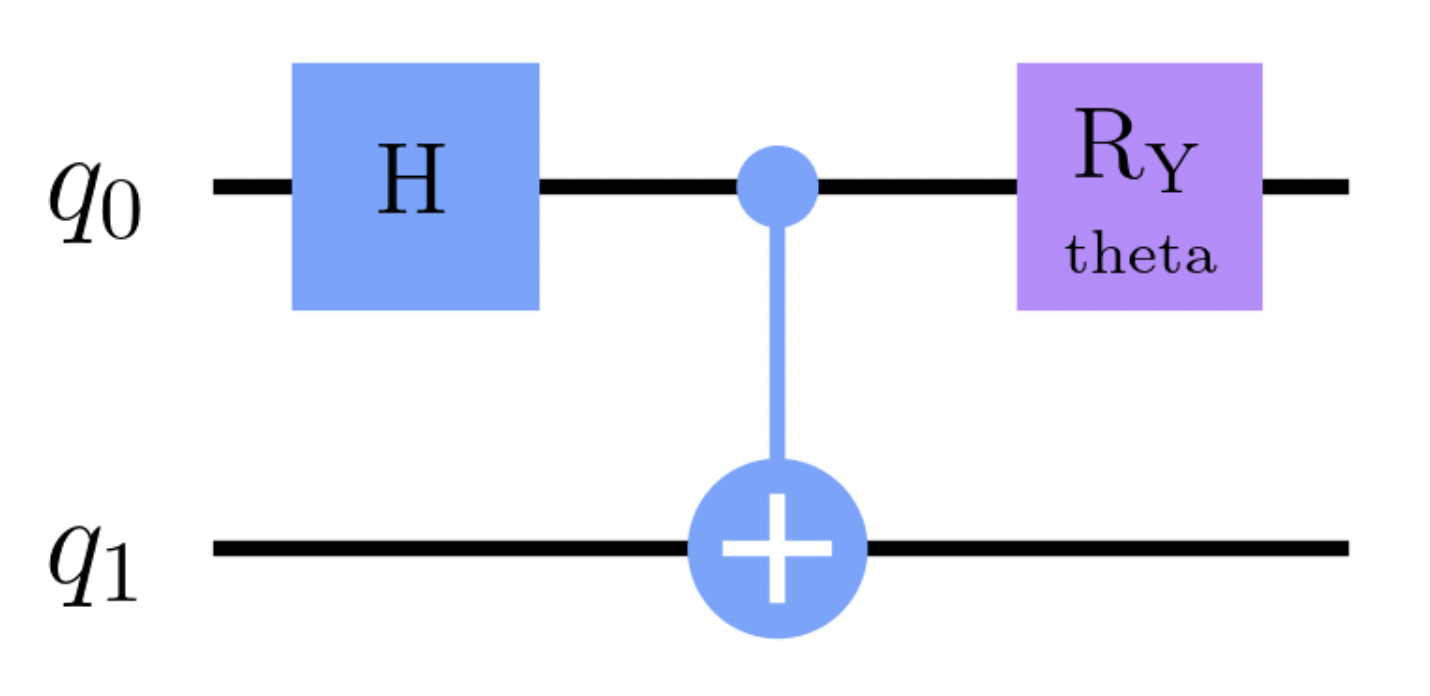

In [ ]:
backend = service.backends(simulator=True)[0]
print(backend)

In [ ]:
sampler_circuit = # build your code here

In [ ]:
estimator_circuit = QuantumCircuit(2)

#
#
# build your code here
#
#

In [ ]:
# parameters for estimator_circuit

number_of_phases = 10
phases = np.linspace(0, 2*np.pi, number_of_phases)
individual_phases = [[ph] for ph in phases]

# observables for estimator_circuit

Z0Z1 = # build your code here
X0Z1 = # build your code here
Z0X1 = # build your code here
X0X1 = # build your code here

ops = [Z0Z1, X0Z1, Z0X1, X0X1] # DO NOT CHANGE THE ORDER

In [ ]:
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

options_with_em = Options(
    simulator={ # Do not change values in simulator
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    # build your code here. Activate TREX for Estimator and M3 for sampler.
)

In [ ]:
with Session(service=service, backend=backend):
    
    sampler = # build your code here
    sampler_result = # build your code here
    
    estimator = # build your code here
    estimator_result = []
    for op in ops:
        job = # build your code here
        result = job.result()
        estimator_result.append(result)
    

In [ ]:
result = [sampler_result, estimator_result]

In [ ]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex5

grade_lab1_ex5(result) # Expected result type: List[SamplerResult, [EstimatorResult, EstimatorResult, EstimatorResult, EstimatorResult]]

### Additional resource

아래 그래프를 그려서 `estimator_result`를 확인해 봅시다!

In [ ]:
chsh_est_sim_val = [2.019, 0.25, -1.5855, -2.702, -2.57, -1.2165, 0.7235, 2.318, 2.812, 1.999]
chsh_est_noisy_val = [1.3495, 0.1935, -1.0575, -1.772, -1.61, -0.7935, 0.5215, 1.521, 1.784, 1.277]
chsh_est_em_val = estimator_result[0].values - estimator_result[1].values + estimator_result[2].values + estimator_result[3].values

fig, ax = plt.subplots(figsize=(10, 6))
# results from a simulator
ax.plot(phases/np.pi, chsh_est_sim_val, 'o-', label='CHSH Simulation')
ax.plot(phases/np.pi, chsh_est_noisy_val, 'o-', label='CHSH Noisy Simulation')
ax.plot(phases/np.pi, chsh_est_em_val, 'o-', label='CHSH Noisy Simulation with EM')
# classical bound +-2
ax.axhline(y=2, color='r', linestyle='--')
ax.axhline(y=-2, color='r', linestyle='--')
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2)*2, color='b', linestyle='-.')
ax.axhline(y=-np.sqrt(2)*2, color='b', linestyle='-.')
# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
# set title, labels, and legend
plt.title('Violation of CHSH Inequality')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')
plt.legend()

<a id="exercise6"></a>

<div class="alert alert-block alert-success">
    
<b> 연습문제 6:</b> 
    
숨겨진 메시지가 무엇인지 파악하셨나요? **아래 답변을 확인하세요!**
    
</div>

In [ ]:
message = "" # build your code here

In [ ]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex6

grade_lab1_ex6(message) # Expected result type: str

# 참조
- [1] **[Scalable mitigation of measurement errors on quantum computers - Paul D. Nation,∗ Hwajung Kang, Neereja Sundaresan, and Jay M. Gambetta](https://arxiv.org/pdf/2108.12518.pdf)**
- [2] **[Documentation: mthree (1.1.0)](https://qiskit.org/documentation/partners/mthree/index.html)**
- [3] **[Fake Provider (qiskit.providers.fake_provider - Qiskit Documentation](https://qiskit.org/documentation/apidoc/providers_fake_provider.html)**
- [4] **[Getting Started - Qiskit Research](https://github.com/qiskit-research/qiskit-research/blob/main/docs/getting_started.ipynb)**
- [5] **[Error mitigation for short-depth quantum circuits - Kristan Temme, Sergey Bravyi and Jay M. Gambetta](https://arxiv.org/pdf/1612.02058.pdf)**
- [6] **[Configure error mitigation - release notes](https://github.com/Qiskit/qiskit-ibm-runtime/blob/main/docs/how_to/error-mitigation.rst)**

# Additional information

<b>Created by:</b> Dayeong Kang, Yuri Kobayashi, Vishal Bajpe, Kifumi Numata

<b>Advisor:</b> Ikko Hanamura

<b>Creative assets by:</b> Radha Pyari Sandhir

<b>Translated and adapted by:</b> Dayeong Kang, Sophy Shin

Version: 1.0

In [ ]:
from qiskit.tools.jupyter import *
%qiskit_version_table